In [23]:
from sklearn.datasets import load_iris
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Create a DataFrame with the data and target
df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

In [24]:
df_iris = df_iris.drop(['sepal length (cm)','sepal width (cm)'], axis = 'columns')
df = df_iris

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])


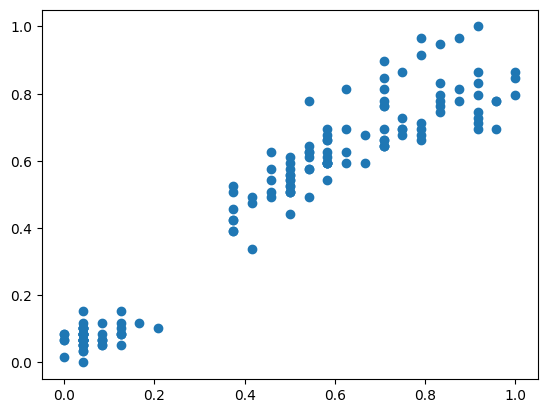

In [26]:
from matplotlib import pyplot as plt
plt.scatter(df['petal width (cm)'],df['petal length (cm)'])

In [27]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal width (cm)','petal length (cm)']])
y_predicted

/home/m1069009/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
df['cluster']=y_predicted
df.head()

,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1


In [29]:
km.cluster_centers_

array([[0.51041667, 0.55867014],
       [0.06083333, 0.07830508],
       [0.81510417, 0.7740113 ]])

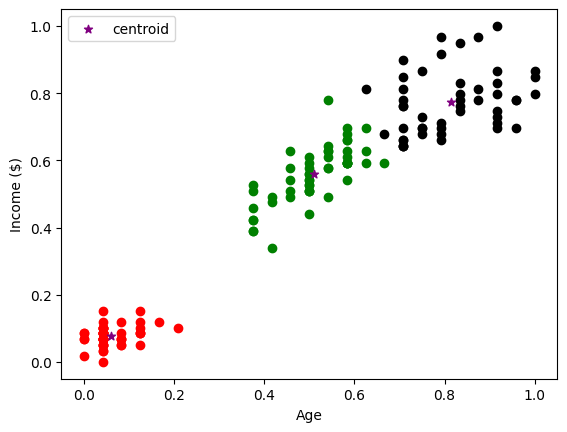

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal width (cm)'],df1['petal length (cm)'],color='green')
plt.scatter(df2['petal width (cm)'],df2['petal length (cm)'],color='red')
plt.scatter(df3['petal width (cm)'],df3['petal length (cm)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()